1.   Load the data and load all the libraries
2.   Data Preparation and Data transformation
     1. Convert all text into LowerCase
     2. Remove all special characters
     3. Remove stop words
     4. Lemmatization and Stemming
3.   Vectorization
     1. TFIDF Vectorizer
4.   Machine Learning and also Deep Learning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re

from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df=pd.read_csv("/content/spam.csv",encoding = 'latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df=df.loc[:,["v1","v2"]]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<Axes: >

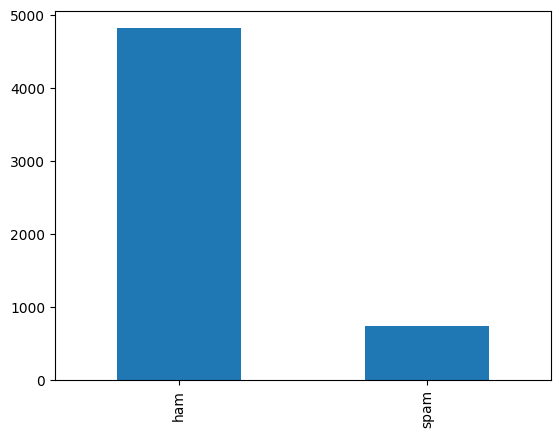

In [ ]:
df["v1"].value_counts().plot(kind='bar')

In [ ]:
df["v2"].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

In [ ]:
len(df["v2"])

5572

In [ ]:
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
nltk.download('wordnet')
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df["v2"]=df["v2"].map(lambda s:preprocess(s))

In [ ]:
df["v2"]

0       jurong point crazy available bugis great world...
1                                      lar joking wif oni
2       free entry wkly comp win cup final tkts may te...
3                           dun say early hor already say
4                  nah think goes usf lives around though
                              ...                        
5567    time tried contact pound prize claim easy call...
5568                                 going esplanade home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: v2, Length: 5572, dtype: object

# VECTORIZED TEXT

In [ ]:
vect=TfidfVectorizer()

In [ ]:
x=vect.fit_transform(df["v2"])

In [ ]:
x.shape

(5572, 7386)

In [ ]:
type(x)

scipy.sparse._csr.csr_matrix

In [ ]:
le=LabelEncoder()
df["v1"]=le.fit_transform(df["v1"])

In [ ]:
y=df["v1"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)

In [ ]:
x_train.shape

(4457, 7386)

In [ ]:
x_test.shape

(1115, 7386)

In [ ]:
def report(x,y):
  print("Accuracy : ",accuracy_score(x,y))
  print(confusion_matrix(x,y))
  print(classification_report(x,y))

# RANDOM FOREST

**RANDOMIZED SEARCH CV**

In [ ]:
random_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

from sklearn.model_selection import RandomizedSearchCV
rs=RandomizedSearchCV(estimator=rfc, param_distributions=random_grid, random_state=49,verbose=2 )



In [ ]:
search=rs.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=log_loss, max_depth=80, min_samples_leaf=1, min_samples_split=2, n_estimators=230; total time=   7.1s
[CV] END criterion=log_loss, max_depth=80, min_samples_leaf=1, min_samples_split=2, n_estimators=230; total time=   9.2s
[CV] END criterion=log_loss, max_depth=80, min_samples_leaf=1, min_samples_split=2, n_estimators=230; total time=  10.5s
[CV] END criterion=log_loss, max_depth=80, min_samples_leaf=1, min_samples_split=2, n_estimators=230; total time=   8.7s
[CV] END criterion=log_loss, max_depth=80, min_samples_leaf=1, min_samples_split=2, n_estimators=230; total time=   9.3s
[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.7s
[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.7s
[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estima

In [ ]:
search.best_params_

{'n_estimators': 230,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 80,
 'criterion': 'log_loss'}

In [ ]:
search.best_score_

0.9737486977397293

In [ ]:
rfc=RandomForestClassifier( n_estimators= 230,min_samples_split= 2,min_samples_leaf= 1,max_depth= 80,criterion= 'log_loss')

rfc.fit(x_train.toarray(), y_train)

rfc_preds_train = rfc.predict(x_train.toarray())
rfc_preds_test = rfc.predict(x_test.toarray())

In [ ]:
report(y_train,rfc_preds_train)
report(y_test,rfc_preds_test)

Accuracy :  0.9975319721785955
[[3863    0]
 [  11  583]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3863
           1       1.00      0.98      0.99       594

    accuracy                           1.00      4457
   macro avg       1.00      0.99      0.99      4457
weighted avg       1.00      1.00      1.00      4457

Accuracy :  0.9695067264573991
[[962   0]
 [ 34 119]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       962
           1       1.00      0.78      0.88       153

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



# XGBOOST

In [ ]:
import xgboost as xgb

In [ ]:
xgb=xgb.XGBClassifier()
xgb.fit(x_train.toarray(), y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
xgb_preds_train = xgb.predict(x_train.toarray())
xgb_preds_test = xgb.predict(x_test.toarray())

In [ ]:
report(y_train,xgb_preds_train)
report(y_test,xgb_preds_test)

Accuracy :  0.9908009872111285
[[3863    0]
 [  41  553]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3863
           1       1.00      0.93      0.96       594

    accuracy                           0.99      4457
   macro avg       0.99      0.97      0.98      4457
weighted avg       0.99      0.99      0.99      4457

Accuracy :  0.97847533632287
[[955   7]
 [ 17 136]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       962
           1       0.95      0.89      0.92       153

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



# NAIVE BAYES

In [ ]:
nb=GaussianNB()
nb.fit(x_train.toarray(), y_train)

nb_preds_train = nb.predict(x_train.toarray())
nb_preds_test = nb.predict(x_test.toarray())

report(y_train,nb_preds_train)
report(y_test,nb_preds_test)

Accuracy :  0.9333632488220777
[[3566  297]
 [   0  594]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      3863
           1       0.67      1.00      0.80       594

    accuracy                           0.93      4457
   macro avg       0.83      0.96      0.88      4457
weighted avg       0.96      0.93      0.94      4457

Accuracy :  0.862780269058296
[[829 133]
 [ 20 133]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.92       962
           1       0.50      0.87      0.63       153

    accuracy                           0.86      1115
   macro avg       0.74      0.87      0.78      1115
weighted avg       0.91      0.86      0.88      1115



# TRANSFER LEARNING

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.2 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline
!pip install xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 6.1 MB/s eta 0:00:00


In [ ]:
pip=pipeline("text-classification", model="skandavivek2/spam-classifier")

In [ ]:
preds=pip(str(df['v2'][2]))

In [ ]:
preds

[{'label': 'SPAM', 'score': 0.9995269775390625}]

# GRADIO

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.2/294.2 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.3 MB/s eta 0:00:00
   

In [ ]:
import gradio as gr


In [ ]:
def transform(text):
  transformed_text=preprocess(text)
  vec=vect.transform([transformed_text])
  result=xgb.predict(vec)[0]

  return {'HAM':float(result[0]),"SPAM":float(result[1])}


In [ ]:
mod=gr.Interface(fn=transform,inputs=gr.Textbox(),outputs='label')

In [ ]:
mod.launch(share=True,debug=True)

Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://905c4bee80c368f289.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/routes.py", line 442, in run_predict
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1392, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1097, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 807, in run
    result = context.run(func, *args)
  File "/usr/local/lib/python3.10/dist-packages/gradio/utils.py", line 703, in wrapper
    response = f(*args, **kwargs)
  Fi

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://905c4bee80c368f289.gradio.live
